In [23]:
from datasets import load_dataset
import pandas as pd
import plotly.express as px

In [2]:
mbr_data = load_dataset('recmeapp/mobilerec', data_dir='interactions')

In [3]:
print(mbr_data.keys())

dict_keys(['train'])


In [5]:
df = pd.DataFrame(mbr_data["train"][:1000])

In [7]:
print(df.head())

print(df.info())

print(df.describe()) 

                  app_package  \
0       com.cleverapps.heroes   
1                com.bodyfast   
2  com.thrivegames.wordshapes   
3  com.affinity.rewarded_play   
4        dating.inmessage.net   

                                              review  rating  votes  \
0                             It's really a fun game       5      1   
1  uninstalling. it was ok but felt like it was c...       2      0   
2                                     Love this game       4      1   
3  Doesn't update play time. Just downloaded it 3...       1      1   
4  app crashes every time I try to log in. what g...       1      0   

                date               uid formated_date  unix_timestamp  \
0   October 21, 2018  shqoc6X1fcJRLEmx    2018-10-21    1.540094e+09   
1   January 18, 2019  shqoc6X1fcJRLEmx    2019-01-18    1.547788e+09   
2   January 16, 2021  shqoc6X1fcJRLEmx    2021-01-16    1.610773e+09   
3   November 4, 2021  shqoc6X1fcJRLEmx    2021-11-04    1.635998e+09   
4  November 24

In [8]:
print(df.columns)

Index(['app_package', 'review', 'rating', 'votes', 'date', 'uid',
       'formated_date', 'unix_timestamp', 'app_category'],
      dtype='object')


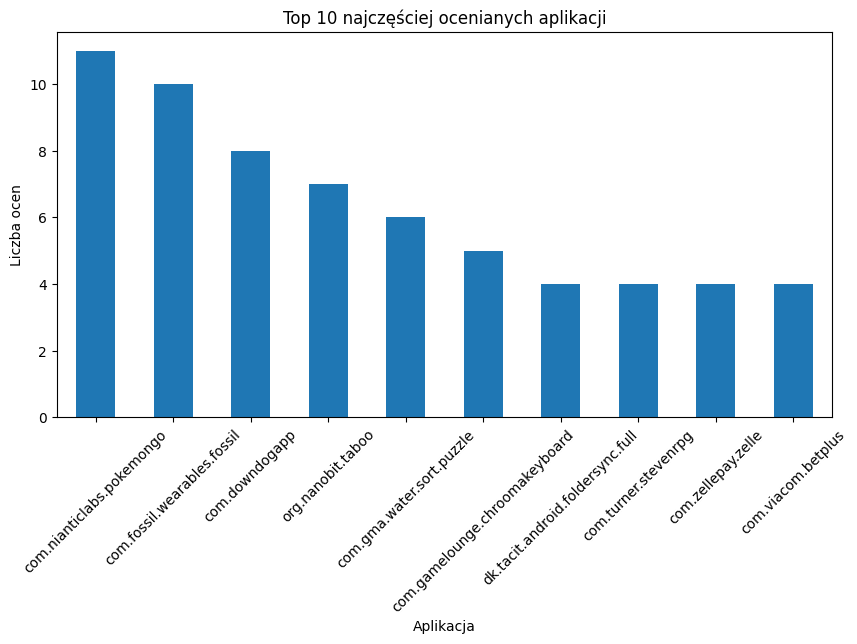

In [10]:
import matplotlib.pyplot as plt

top_apps = df["app_package"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_apps.plot(kind="bar")
plt.title("Top 10 najczęściej ocenianych aplikacji")
plt.xlabel("Aplikacja")
plt.ylabel("Liczba ocen")
plt.xticks(rotation=45)
plt.show()

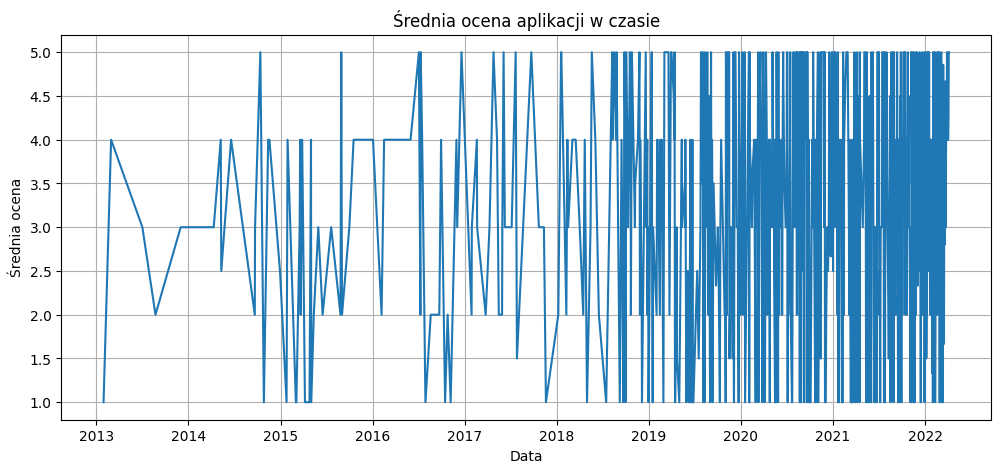

In [15]:
df["date"] = pd.to_datetime(df["unix_timestamp"], unit='s')
avg_rating_per_day = df.groupby(df["date"].dt.date)["rating"].mean()

plt.figure(figsize=(12,5))
avg_rating_per_day.plot()
plt.title("Średnia ocena aplikacji w czasie")
plt.xlabel("Data")
plt.ylabel("Średnia ocena")
plt.grid()
plt.show()

In [ ]:
df["formated_date"] = pd.to_datetime(df["formated_date"])

com.nianticlabs.pokemongo           11
com.fossil.wearables.fossil         10
com.downdogapp                       8
org.nanobit.taboo                    7
com.gma.water.sort.puzzle            6
com.gamelounge.chroomakeyboard       5
dk.tacit.android.foldersync.full     4
com.turner.stevenrpg                 4
com.zellepay.zelle                   4
com.viacom.betplus                   4
Name: app_package, dtype: int64


In [ ]:
#top 10 aplikacji z największą ilością ocen
top_apps = df["app_package"].value_counts().head(10)
print("top 10 aplikacji z największą ilością ocen:")
print(top_apps)


top 10 aplikacji z największą ilością ocen
com.nianticlabs.pokemongo           11
com.fossil.wearables.fossil         10
com.downdogapp                       8
org.nanobit.taboo                    7
com.gma.water.sort.puzzle            6
com.gamelounge.chroomakeyboard       5
dk.tacit.android.foldersync.full     4
com.turner.stevenrpg                 4
com.zellepay.zelle                   4
com.viacom.betplus                   4
Name: app_package, dtype: int64


In [20]:
# Średnia ocena według kategorii
avg_by_cat = df.groupby("app_category")["rating"].mean().sort_values(ascending=False)
print("Średnia ocena według kategorii:")
print(avg_by_cat)

Średnia ocena według kategorii:
app_category
Beauty                     4.666667
Parenting                  4.333333
Medical                    4.153846
House & Home               4.000000
Auto & Vehicles            4.000000
Educational                3.933333
Maps & Navigation          3.857143
Simulation                 3.795918
Communication              3.772727
Libraries & Demo           3.625000
Finance                    3.609756
Shopping                   3.606061
Lifestyle                  3.518519
Puzzle                     3.508197
Education                  3.500000
Art & Design               3.500000
Productivity               3.441176
Board                      3.384615
Word                       3.375000
Card                       3.363636
Video Players & Editors    3.333333
Adventure                  3.326087
Role Playing               3.313433
Strategy                   3.285714
Action                     3.266667
Photography                3.250000
Health & Fitness   

In [21]:
import streamlit as st
st.set_page_config(page_title="📈 Trend ocen aplikacji", layout="wide")
st.title("Trend ocen aplikacji mobilnych w czasie")

2025-03-21 10:59:16.988 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 10:59:16.989 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 10:59:17.188 
  command:

    streamlit run C:\Users\Tralb\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-21 10:59:17.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [22]:
mode = st.radio("Wybierz tryb analizy:", ["Pojedyncza aplikacja", "Kategoria aplikacji"])
if mode == "Pojedyncza aplikacja":
    selected_app = st.selectbox("Wybierz aplikację (package):", df["app_package"].unique())

2025-03-21 11:00:58.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00:58.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00:58.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00:58.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00:58.309 Session state does not function when running a script without `streamlit run`
2025-03-21 11:00:58.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00:58.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00:58.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:00

In [25]:
df_filtered = df[df["app_package"] == selected_app]
trend = df_filtered.groupby("formated_date")["rating"].mean().reset_index()
fig = px.line(
    trend,
    x="formated_date",
    y="rating",
    title=f"Średnia ocena aplikacji: {selected_app}",
    labels={"formated_date": "Data", "rating": "Średnia ocena"},
)
st.plotly_chart(fig, use_container_width=True)

2025-03-21 11:16:17.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:16:17.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:16:17.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 11:16:17.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
import streamlit as st
import plotly.express as px

st.set_page_config(page_title="📊 Analiza Aplikacji Mobilnych", layout="wide")


df["date"] = pd.to_datetime(df["timestamp"], unit='s')

st.title("📊 Analiza Rekomendacji Aplikacji Mobilnych")

selected_app = st.selectbox("Wybierz aplikację:", df["app_name"].unique())

filtered_df = df[df["app_name"] == selected_app]


In [27]:
df.to_csv('mobilerec_data.csv', index=False)